# Introduction
* Team Name: Team XV
* Team Members: The Vi Tran, Xianyu Zhao
* Metric: Health and Safety
  * We came up with this metric since we both decided that the best neighborhood to live in is the neighborhood where we'd want our families to be healthy and safe, hence the metric, Health and Safety.
* Datasets: Police Incident Reports, Green Space Data, and Fire Incidents


# The Metric
* The metric that we choose was health and safety. We used the Police Incident Reports and the Fire Incidents data to represent the safety of each neighborhood and used the Green Space data to represent the healthiness of a neighborhood. We will later weigh some of the data differently and prioritize the Police Incident Reports and Fire Incidents over the Green Space data.

In [263]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import geopandas

### Police Incident Report Data

In [264]:
policeFile = pd.read_csv('policeData.csv')
incidentNeighborhood = policeFile["INCIDENTNEIGHBORHOOD"]

Creating a dictionary from the police dataset, and the removal of duplicates neighborhoods and editing neighborhood names for consistency.

In [265]:
myNeighborhoodDictPoliceData = {}
incidentNeighborhood = incidentNeighborhood.fillna("Unknown Neighborhood")
for neighborhoods in incidentNeighborhood:
    if neighborhoods in myNeighborhoodDictPoliceData:
        myNeighborhoodDictPoliceData[neighborhoods] += 1
    else:
        myNeighborhoodDictPoliceData[neighborhoods] = 1

myNeighborhoodDictPoliceData["Mount Oliver"] += myNeighborhoodDictPoliceData["Mt. Oliver Boro"]
myNeighborhoodDictPoliceData["Mount Oliver"] += myNeighborhoodDictPoliceData["Mt. Oliver Neighborhood"]
del myNeighborhoodDictPoliceData["Mt. Oliver Boro"]
del myNeighborhoodDictPoliceData["Mt. Oliver Neighborhood"]
del myNeighborhoodDictPoliceData["Unknown Neighborhood"]
myNeighborhoodDictPoliceData["Central Business District"] += myNeighborhoodDictPoliceData["Golden Triangle/Civic Arena"]
del myNeighborhoodDictPoliceData["Golden Triangle/Civic Arena"]
myNeighborhoodDictPoliceData["Central Northside"] += myNeighborhoodDictPoliceData["Central North Side"]
del myNeighborhoodDictPoliceData["Central North Side"]
del myNeighborhoodDictPoliceData["Outside City"]
del myNeighborhoodDictPoliceData["Outside County"]
del myNeighborhoodDictPoliceData["Outside State"]
myNeighborhoodDictPoliceData["Troy Hill"] += myNeighborhoodDictPoliceData["Troy Hill-Herrs Island"]
del myNeighborhoodDictPoliceData["Troy Hill-Herrs Island"]
myNeighborhoodDictPoliceData["Mt. Oliver"] = myNeighborhoodDictPoliceData["Mount Oliver"]
del myNeighborhoodDictPoliceData["Mount Oliver"]

Creating a dataframe from the police incident dictionary and plotting the raw data.

<Axes: >

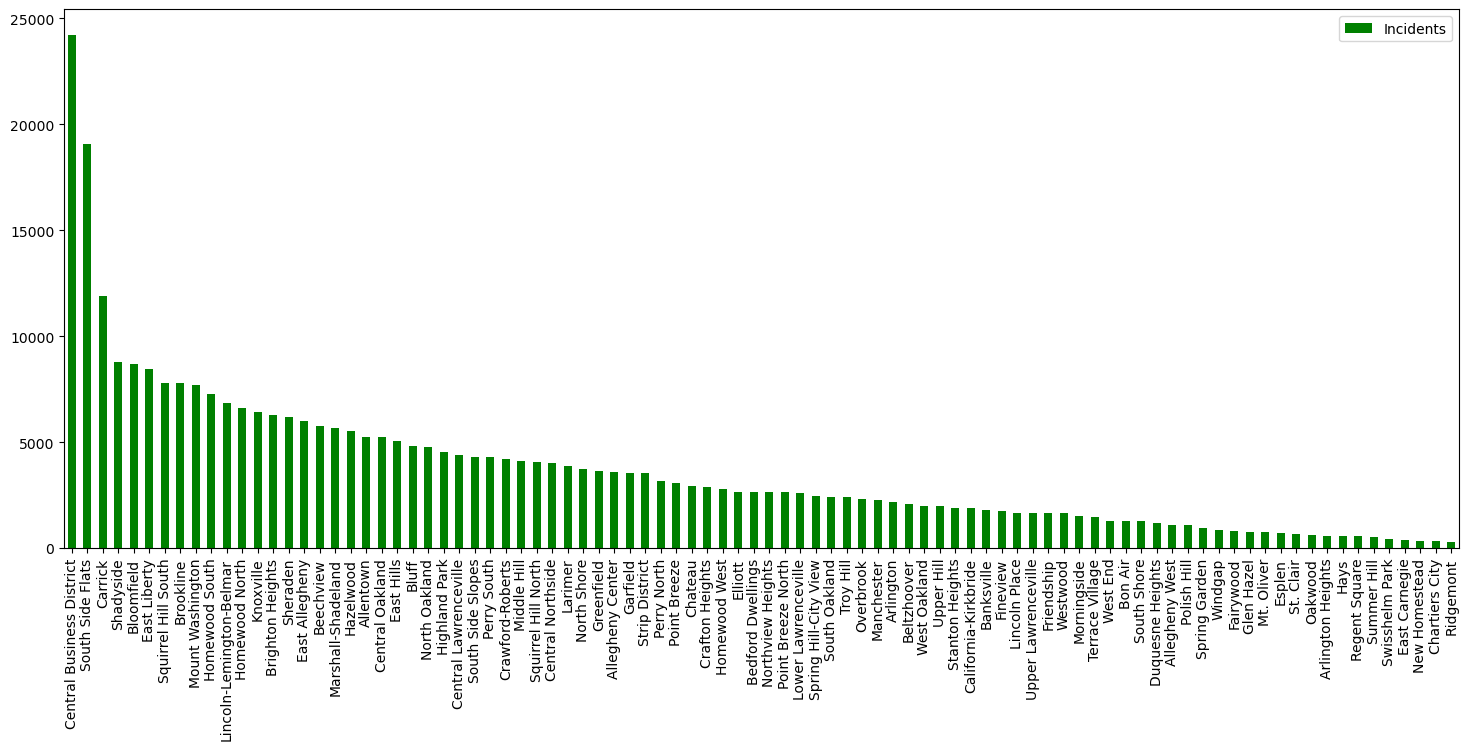

In [266]:
df = pd.DataFrame.from_dict(myNeighborhoodDictPoliceData, orient='index')
df.columns = ["Incidents"]
df.sort_values(by=['Incidents'], ascending = False, inplace = True)
plt.rcParams["figure.figsize"] = (18, 7)
df.plot(    kind='bar',
            y='Incidents',
            color='green',)

### Green Space Data

In [267]:
greenlandData = pd.read_csv('greenlandData.csv')
greenlandData = greenlandData.fillna(0)

Creating a dictionary from the Green Space dataset.

In [268]:
myNeighborhoodDictGreenlandData = {}
for rowNum in range(0,greenlandData.shape[0]):
    neighborhood = greenlandData.iloc[rowNum,27]
    totalAcreage = float(greenlandData.iloc[rowNum,3])
    if neighborhood == 0:
        pass
    elif neighborhood in myNeighborhoodDictGreenlandData:
        myNeighborhoodDictGreenlandData[neighborhood] += totalAcreage
    else:
        myNeighborhoodDictGreenlandData[neighborhood] = totalAcreage

Creating a dataframe from the Green Space dictionary and plotting the raw data.

<Axes: >

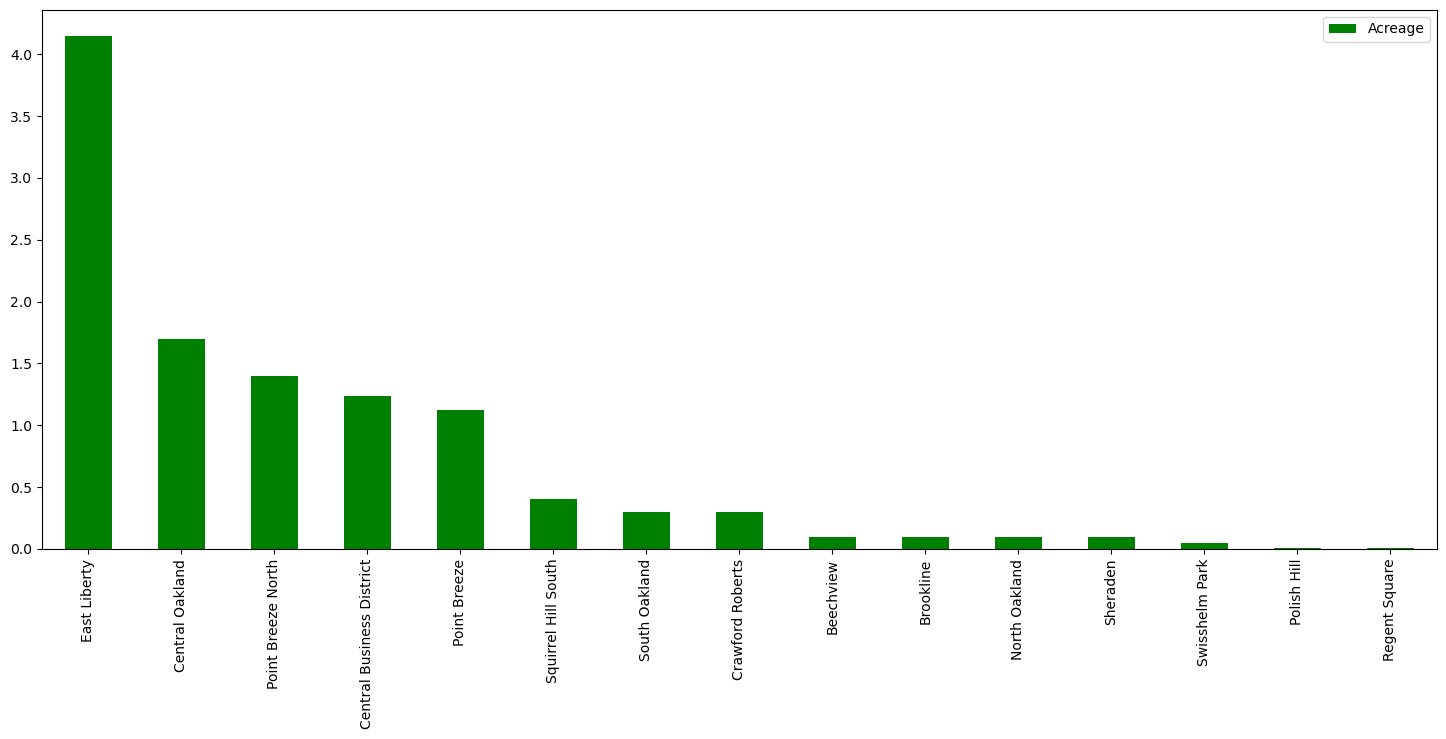

In [269]:
gdf = pd.DataFrame.from_dict(myNeighborhoodDictGreenlandData, orient='index')
gdf.columns = ["Acreage"]
gdf.sort_values(by=['Acreage'], ascending = False, inplace = True)
plt.rcParams["figure.figsize"] = (18, 7)
gdf.plot(   kind='bar',
            y='Acreage',
            color='green',)

### Data normalization for Police Incident Reports and Green Space data.

Finding the max value of the neighborhood in their respective datasets. Editing of the name of one neighborhood for consistency.

In [270]:
crimeMax = max(myNeighborhoodDictPoliceData.values())
greenlandMax = max(myNeighborhoodDictGreenlandData.values())

myNeighborhoodDictGreenlandData["Crawford-Roberts"] = myNeighborhoodDictGreenlandData["Crawford Roberts"]
del myNeighborhoodDictGreenlandData['Crawford Roberts']

Normalizing the data for both the Police Incident Reports and the Green Space data. For the Police Incident Reports data, we used the complement of each neighborhoods' score since the higher the score for this specific data, the worse the neighborhood is. Then plotting the normalized score of each of the datasets, each score ranging from 0 - 10.

<Axes: >

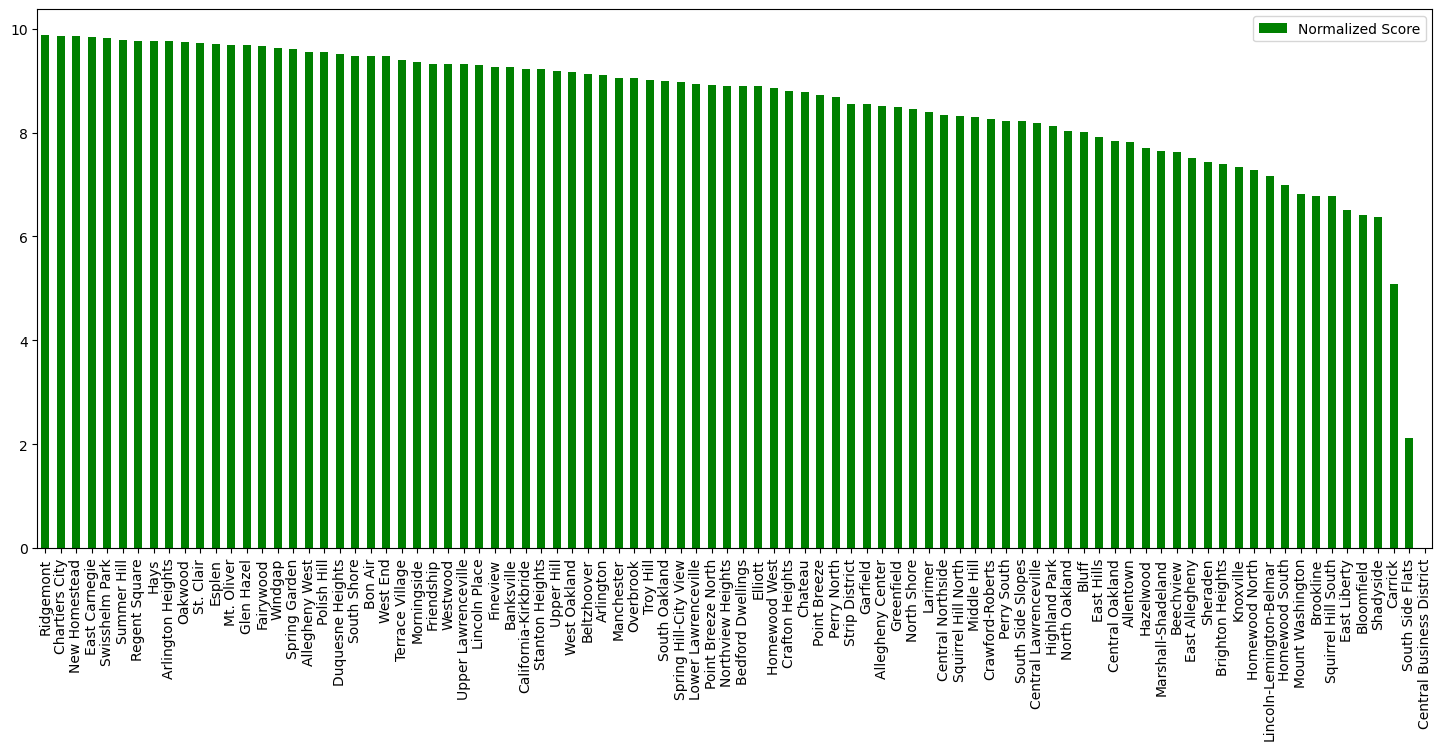

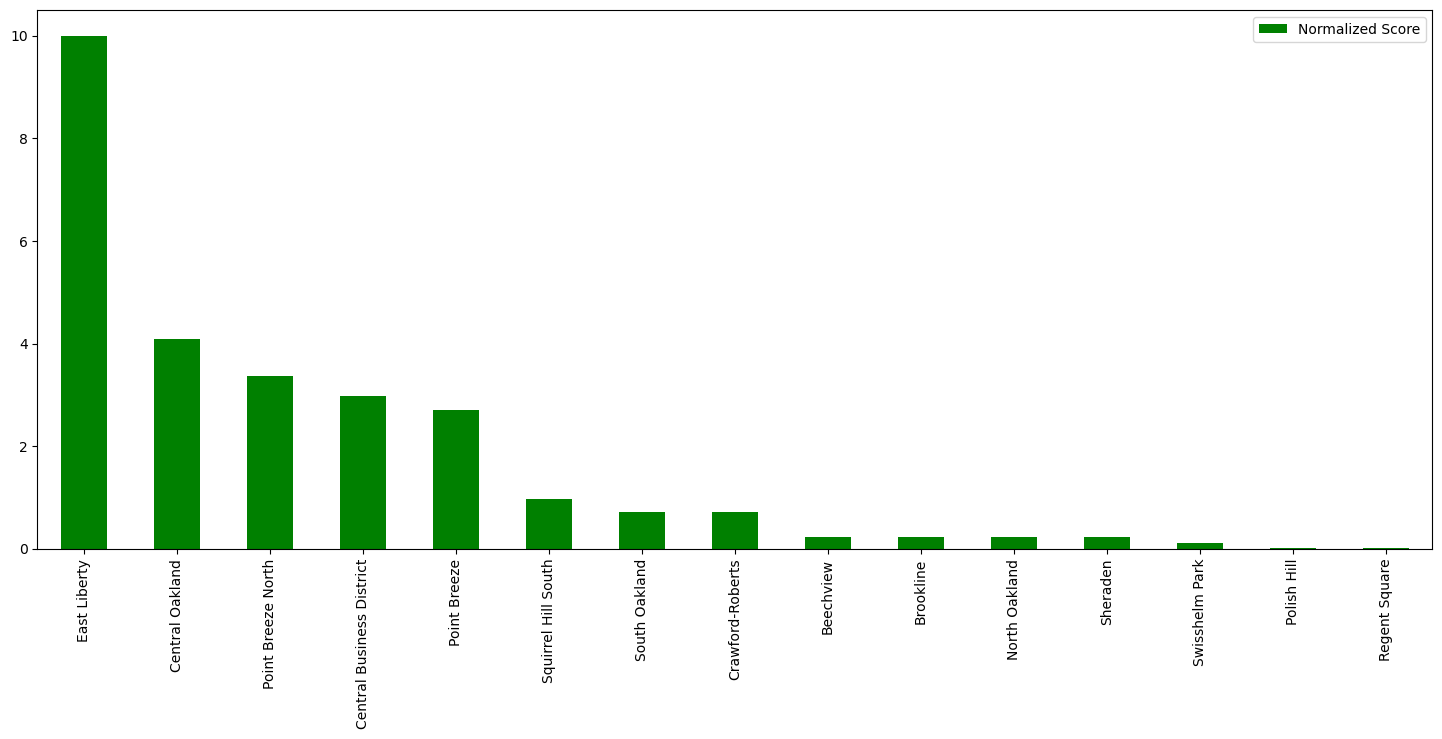

In [271]:
for keys in myNeighborhoodDictPoliceData:
    myNeighborhoodDictPoliceData[keys] = (1 - (myNeighborhoodDictPoliceData[keys]/crimeMax)) * 10

ndf = pd.DataFrame.from_dict(myNeighborhoodDictPoliceData, orient='index')
ndf.columns = ["Normalized Score"]
ndf.sort_values(by=['Normalized Score'], ascending = False, inplace = True)
plt.rcParams["figure.figsize"] = (18, 7)
ndf.plot(   kind='bar',
            y='Normalized Score',
            color='green',)

for keys in myNeighborhoodDictGreenlandData:
    myNeighborhoodDictGreenlandData[keys] = myNeighborhoodDictGreenlandData[keys]/greenlandMax * 10

ngdf = pd.DataFrame.from_dict(myNeighborhoodDictGreenlandData, orient='index')
ngdf.columns = ["Normalized Score"]
ngdf.sort_values(by=['Normalized Score'], ascending = False, inplace = True)
plt.rcParams["figure.figsize"] = (18, 7)
ngdf.plot(   kind='bar',
            y='Normalized Score',
            color='green',)

### Fire Incidents

In [272]:
fire_incidents = pd.read_csv('fire_incidents_data.csv')
fire_incidents = fire_incidents[fire_incidents['neighborhood'].notna()]

In [273]:
dict = {}

for index, row in fire_incidents.iterrows():
    if row['neighborhood'] in dict:
        dict[row['neighborhood']] += 1
    else:
        dict[row['neighborhood']] = 1

In [274]:
del dict['Mount Oliver Borough']
len(dict)

90

<Axes: >

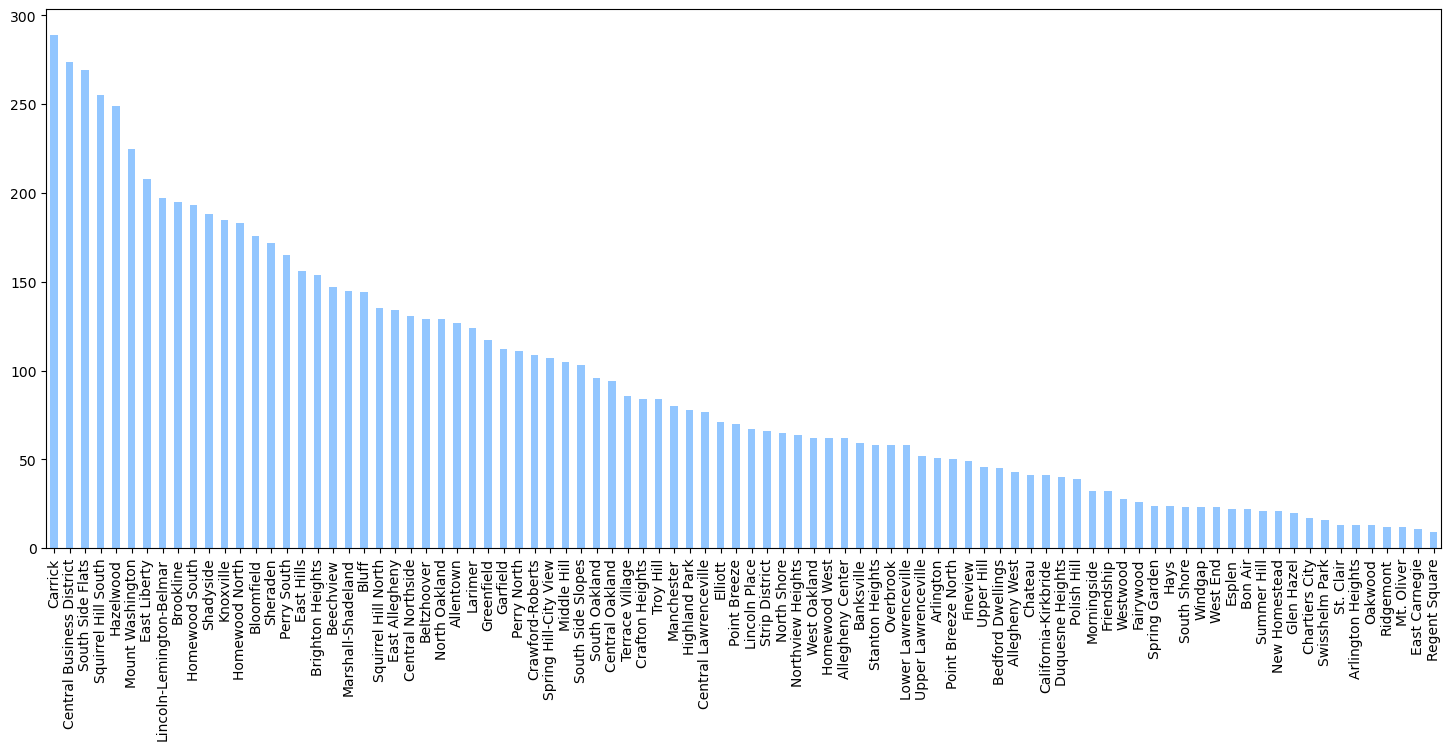

In [275]:
fire_incidents_neighborhood = pd.DataFrame.from_dict(dict, orient='index', columns=['Frequency'])
fire_incidents_neighborhood.sort_values(by=['Frequency'], ascending=False, inplace=True)
plt.rcParams["figure.figsize"] = (18, 7)
plt.style.use('seaborn-v0_8-pastel')
fire_incidents_neighborhood['Frequency'].plot(kind="bar")

In [276]:
population = pd.read_csv('population_data.csv')
population.columns = ['Neighborhood', 'Id', 'Total', 'Margin of Error']
population = population.drop([52])

In [277]:
fire_incidents_neighborhood.sort_index(inplace=True)
fire_incidents_neighborhood.insert(1, "Population", population['Total'].tolist(), 1)

In [278]:
fire_ratio = []
frequency_normalized = []
population_normalized = []
fireList = fire_incidents_neighborhood['Frequency'].tolist()
popList = fire_incidents_neighborhood['Population'].to_list()

maxFire = max(fireList)
minFire = min(fireList)
fireRange = maxFire - minFire

maxPop = max(popList)
minPop = min(popList)
popRange = maxPop - minPop

for i in range(len(fireList)):
    fireNorm = (fireList[i] - minFire) / fireRange
    if (popList[i] != minPop):
        popNorm = (popList[i] - minPop) / popRange
    else:
        popNorm = popList[i] / popRange
    ratio = fireNorm / popNorm
    fire_ratio.append(ratio)

In [279]:
for i in range(len(fire_ratio)):
    if fire_ratio[i] > 6:
        fire_ratio[i] = 6

In [280]:
fire_ratio_normalized = []

maxRate = max(fire_ratio)
minRate = min(fire_ratio)
rateRange = maxRate - minRate

for i in range(len(fire_ratio)):
    ratioNorm = (fire_ratio[i] - minRate) / rateRange
    fire_ratio_normalized.append(ratioNorm)

<Axes: >

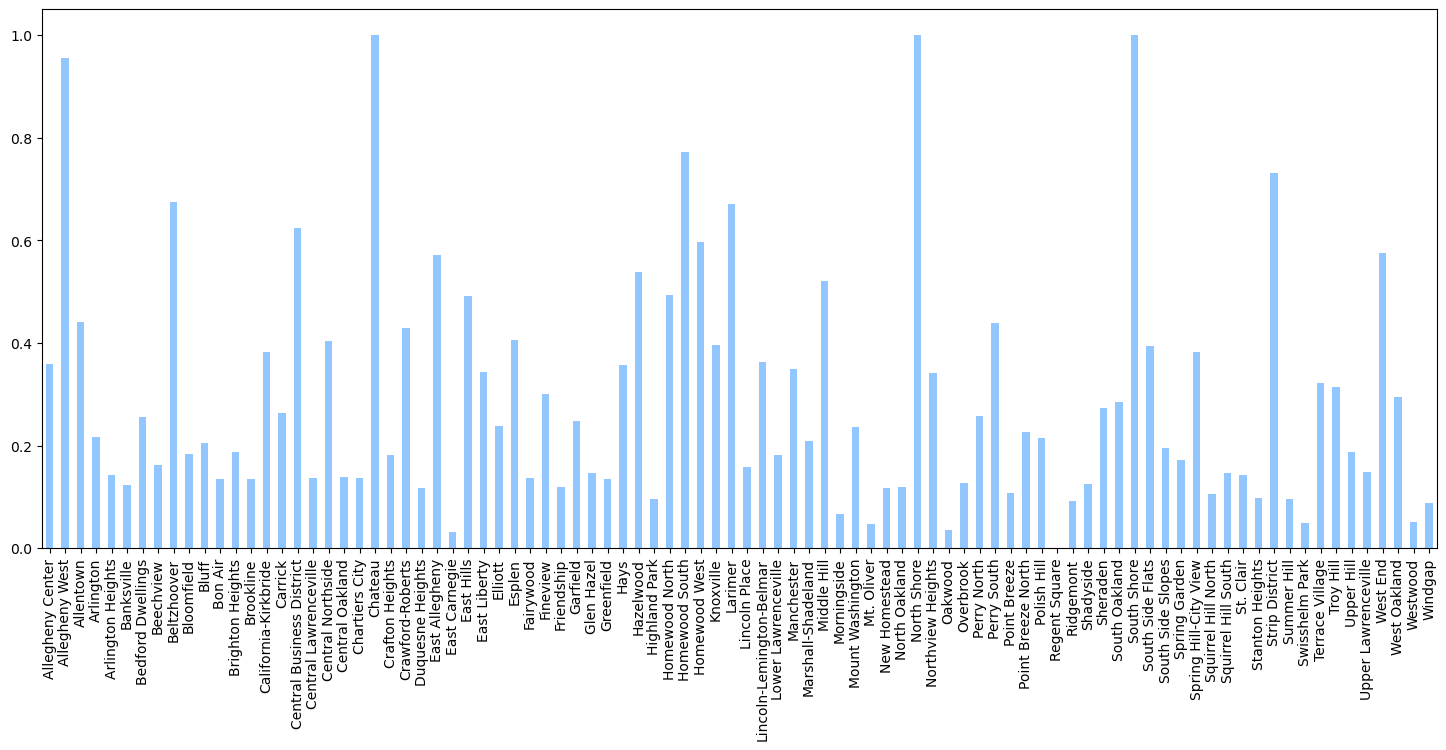

In [281]:
fire_incidents_neighborhood.insert(2, "Rating By Population", fire_ratio_normalized, True)
fire_incidents_neighborhood["Rating By Population"].plot.bar()

In [282]:
fire_incidents_neighborhood.sort_values(by=['Rating By Population'], ascending=False, inplace=True)
fire_incidents_neighborhood.head(20)

,Frequency,Population,Rating By Population
North Shore,65,205.0,1.000000
Chateau,41,3.0,1.000000
South Shore,23,12.0,1.000000
Allegheny West,43,343.0,0.954702
Homewood South,193,2276.0,0.772834
Strip District,66,747.0,0.731425
Beltzhoover,129,1702.0,0.674304
Larimer,124,1641.0,0.670273
Central Business District,274,4060.0,0.623604
Homewood West,62,850.0,0.597393


In [283]:
fire_incidents = fire_incidents[fire_incidents['alarm_time'].notna()]
yearList = []

for time in fire_incidents['alarm_time']:
    year = time[0:4:1]
    yearList.append(year)

fire_incidents.insert(2, "year", yearList, True)
fire_by_year = fire_incidents[['neighborhood','year']]

In [284]:
dict = {}

for index, row in fire_by_year.iterrows():
    if int(row['year']) >= 2022:
        if row['neighborhood'] in dict:
                dict[row['neighborhood']] += 1
        else :
                dict[row['neighborhood']] = 1
    else:
        dict[row['neighborhood']] = 0

del dict['Mount Oliver Borough']
len(dict)

90

In [285]:
by_past_3_years = pd.DataFrame.from_dict(dict, orient='index', columns=['frequency'])
by_past_3_years.sort_index(inplace=True)

In [286]:
fire_incidents_neighborhood.sort_index(inplace=True)
fire_incidents_neighborhood.insert(3, "Past 3 Years frequency", by_past_3_years['frequency'].tolist(), True)
fire_incidents_neighborhood

,Frequency,Population,Rating By Population,Past 3 Years frequency
Allegheny Center,62,1411.0,0.359370,8
Allegheny West,43,343.0,0.954702,5
Allentown,127,2558.0,0.440919,12
Arlington,51,1852.0,0.216860,7
Arlington Heights,13,272.0,0.141963,1
...,...,...,...,...
Upper Lawrenceville,52,2754.0,0.149226,9
West End,23,235.0,0.576114,4
West Oakland,62,1717.0,0.295211,7
Westwood,28,3537.0,0.051328,5


In [287]:
past3 = fire_incidents_neighborhood['Past 3 Years frequency'].tolist()
total = fire_incidents_neighborhood['Frequency'].tolist()
ratio_3_years = []

for i in range(len(past3)):
    ratio3 = past3[i] / total[i]
    ratio_3_years.append(ratio3)

In [288]:
ratio_3_years_normalized = []
maxRate3 = max(ratio_3_years)
minRate3 = min(ratio_3_years)
range3 = maxRate3 - minRate3

for ratio in ratio_3_years:
    ratio3Norm = (ratio - minRate3) / range3
    ratio_3_years_normalized.append(ratio3Norm)

fire_incidents_neighborhood.insert(4, "Rating by increase", ratio_3_years_normalized, True)

In [289]:
fire_incidents_neighborhood.sort_values(by=['Rating By Population'], ascending=False, inplace=True)

In [290]:
scoresList = []
i = 1

for index, row in fire_incidents_neighborhood.iterrows():
    if i <= 10:
        score = 1 - row['Rating by increase'] - 0.1
        if score < 0:
            score = 0
    elif i > 80:
        score = 1 -row['Rating by increase'] + 0.1
        if score > 1:
            score = 1
    else:
        score = 1 - row['Rating by increase']
    
    score *= 10
    score = round(score, 1)
    i += 1
    scoresList.append(score)

In [291]:
fire_incidents_neighborhood.insert(5, "Final Score", scoresList, True)

<Axes: >

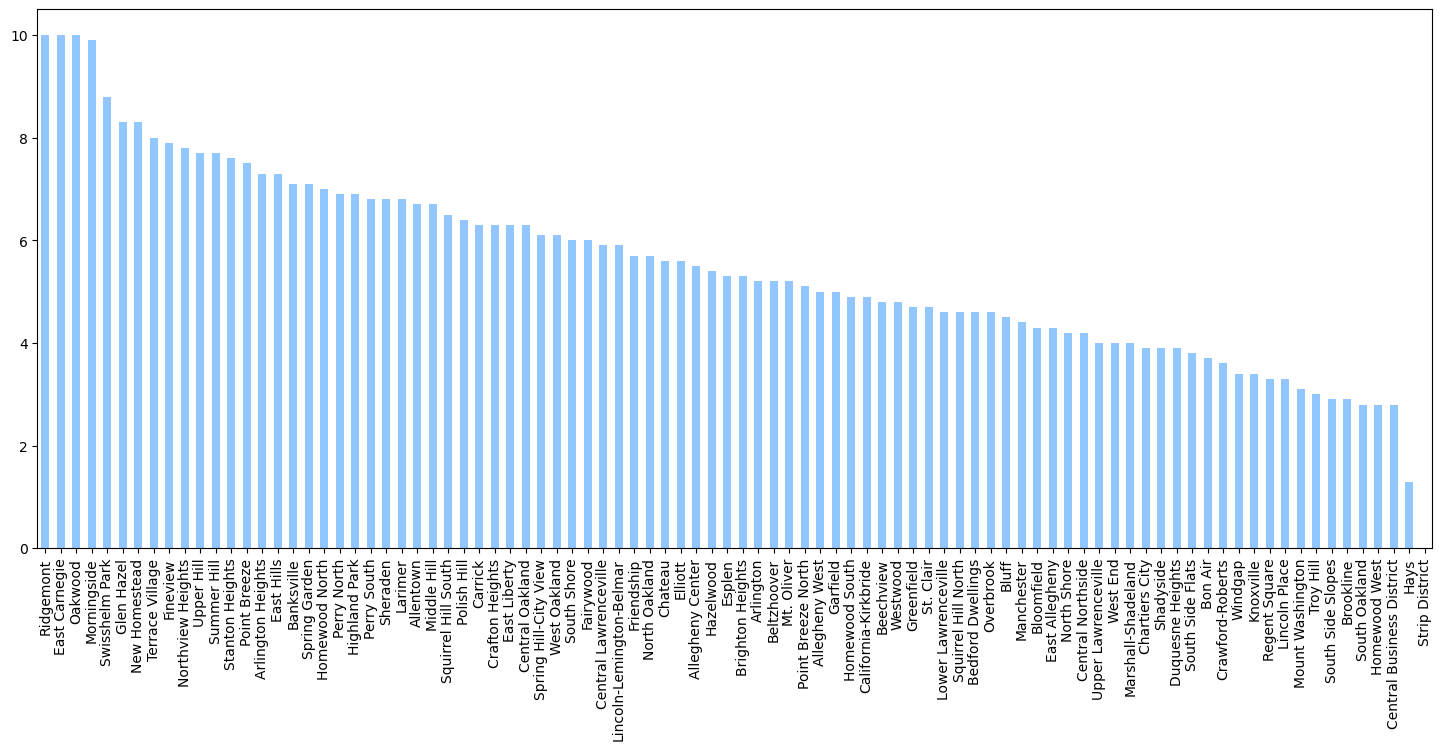

In [292]:
fire_incidents_neighborhood.sort_values(by=['Final Score'], ascending=False, inplace=True)
fire_incidents_neighborhood['Final Score'].plot(kind='bar')

In [293]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

In [294]:
steps_map = neighborhoods.merge(fire_incidents_neighborhood, 
                                how='left', 
                                left_on='hood', 
                                right_on=fire_incidents_neighborhood.index)

In [295]:
steps_map1 = neighborhoods.merge(ndf, 
                                how='left', 
                                left_on='hood', 
                                right_on=ndf.index)

In [296]:
steps_map2 = neighborhoods.merge(ngdf, 
                                how='left', 
                                left_on='hood', 
                                right_on=ngdf.index)

Text(0.5, 69.97084282383948, 'Fire Incidents by Neighborhood')

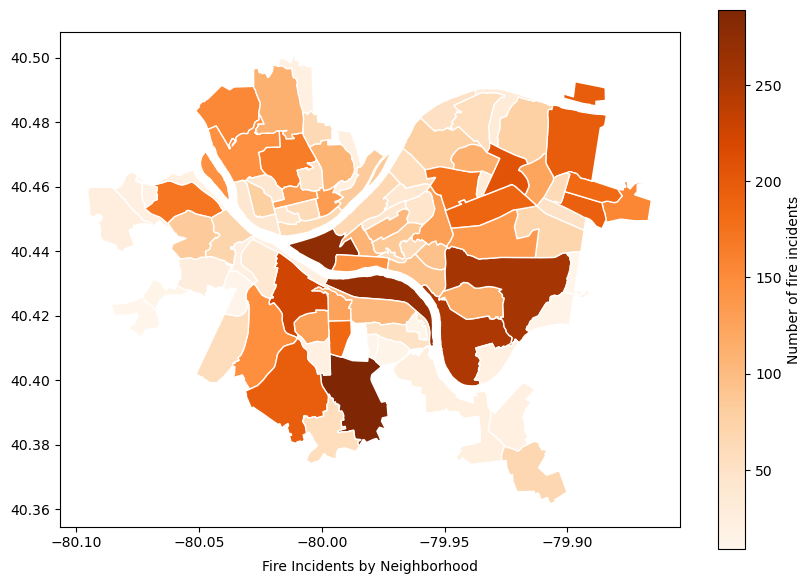

In [297]:
# draw a choropleth map using data from the column named "number_of_steps"
steps_map.plot(column='Frequency',
               cmap='Oranges',
               edgecolor='white',
               legend=True,
               legend_kwds={'label': "Number of fire incidents"},
               figsize=(10, 7),
               missing_kwds={"color": "lightgrey"})
plt.xlabel("Fire Incidents by Neighborhood", labelpad=7)

GeoMap graph of Fire Incidents.

Text(0.5, 69.97084282383948, 'Score by Fire Incidents')

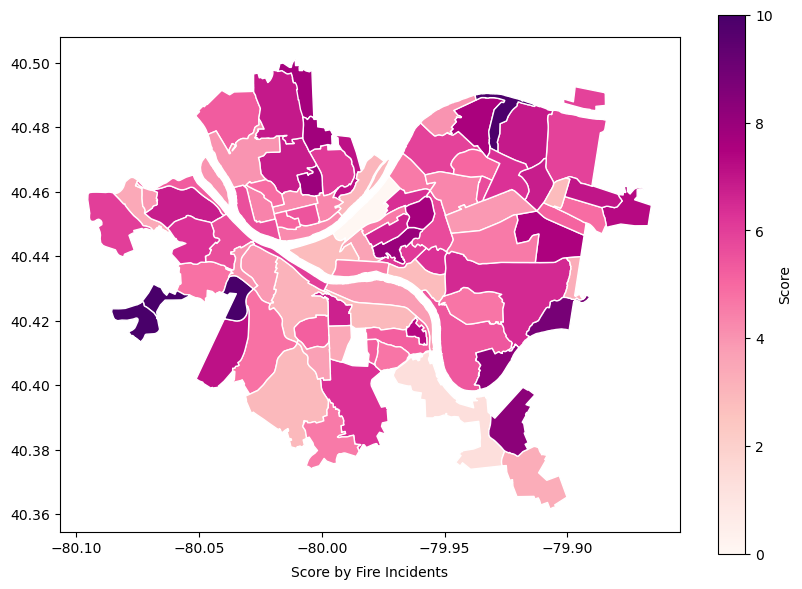

In [298]:
# draw a choropleth map using data from the column named "number_of_steps"
steps_map.plot(column='Final Score',
               cmap='RdPu',
               edgecolor='white',
               legend=True,
               legend_kwds={'label': "Score"},
               figsize=(10, 7),
               missing_kwds={"color": "lightgrey"})
plt.xlabel("Score by Fire Incidents", labelpad=7)

GeoMap graph for the Police Incident Reports.

Text(0.5, 69.97084282383948, 'Score by Crime')

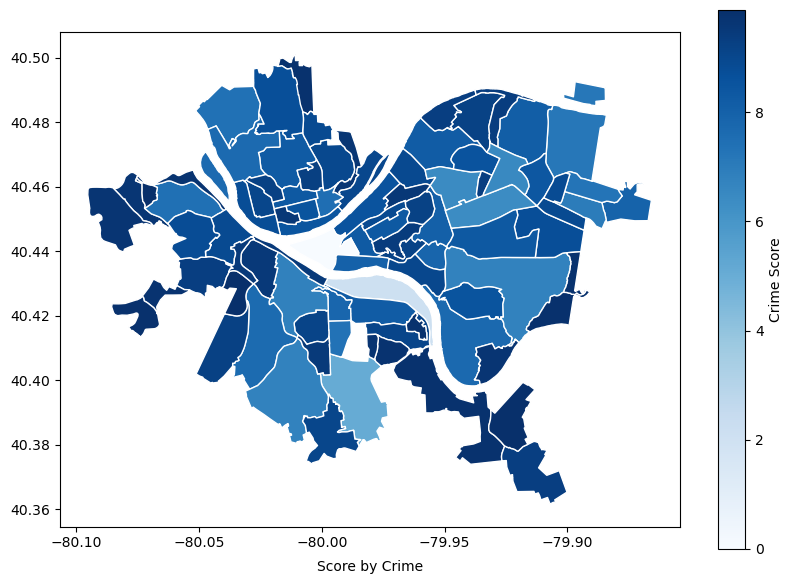

In [299]:
# draw a choropleth map using data from the column named "number_of_steps"
steps_map1.plot(column='Normalized Score',
               cmap='Blues',
               edgecolor='white',
               legend=True,
               legend_kwds={'label': "Crime Score"},
               figsize=(10, 7),
               missing_kwds={"color": "lightgrey"})
plt.xlabel("Score by Crime", labelpad=7)

GeoMap graph for the Green Space data.

Text(0.5, 69.97084282383948, 'Score by Greenspace')

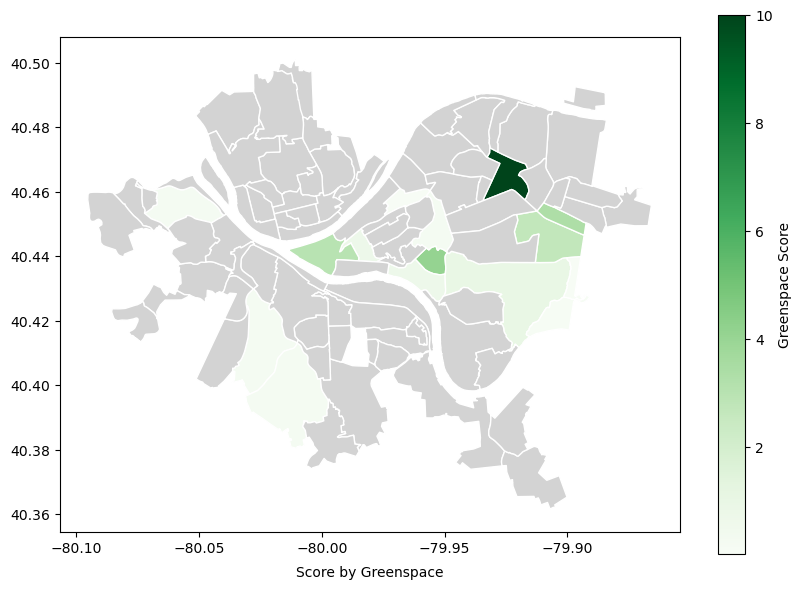

In [300]:
# draw a choropleth map using data from the column named "number_of_steps"
steps_map2.plot(column='Normalized Score',
               cmap='Greens',
               edgecolor='white',
               legend=True,
               legend_kwds={'label': "Greenspace Score"},
               figsize=(10, 7),
               missing_kwds={"color": "lightgrey"})
plt.xlabel("Score by Greenspace", labelpad=7)

### Combining Dataset Scores

Accounting for all the neighborhoods not represented in the Green Space dataset, setting those unrepresented neighborhoods to 0 acres of green space. Creating a new dictionary for the combining of the police incident scores and the green space scores, weighing the scores of the police incidents higher than the scores of the green space dataset, 2 times heavier to be exact.

In [301]:
for neighborhood in myNeighborhoodDictPoliceData:
    if neighborhood in myNeighborhoodDictGreenlandData:
        pass
    else:
        myNeighborhoodDictGreenlandData[neighborhood] = 0

myNeighborhoodDictCrimeAndGreen = {}

for keys in myNeighborhoodDictGreenlandData:
    myNeighborhoodDictCrimeAndGreen[keys] = (myNeighborhoodDictGreenlandData[keys] + (2*myNeighborhoodDictPoliceData[keys]))

Creating a dataframe from the crime score and green space score dictionary and plotting it.

<Axes: >

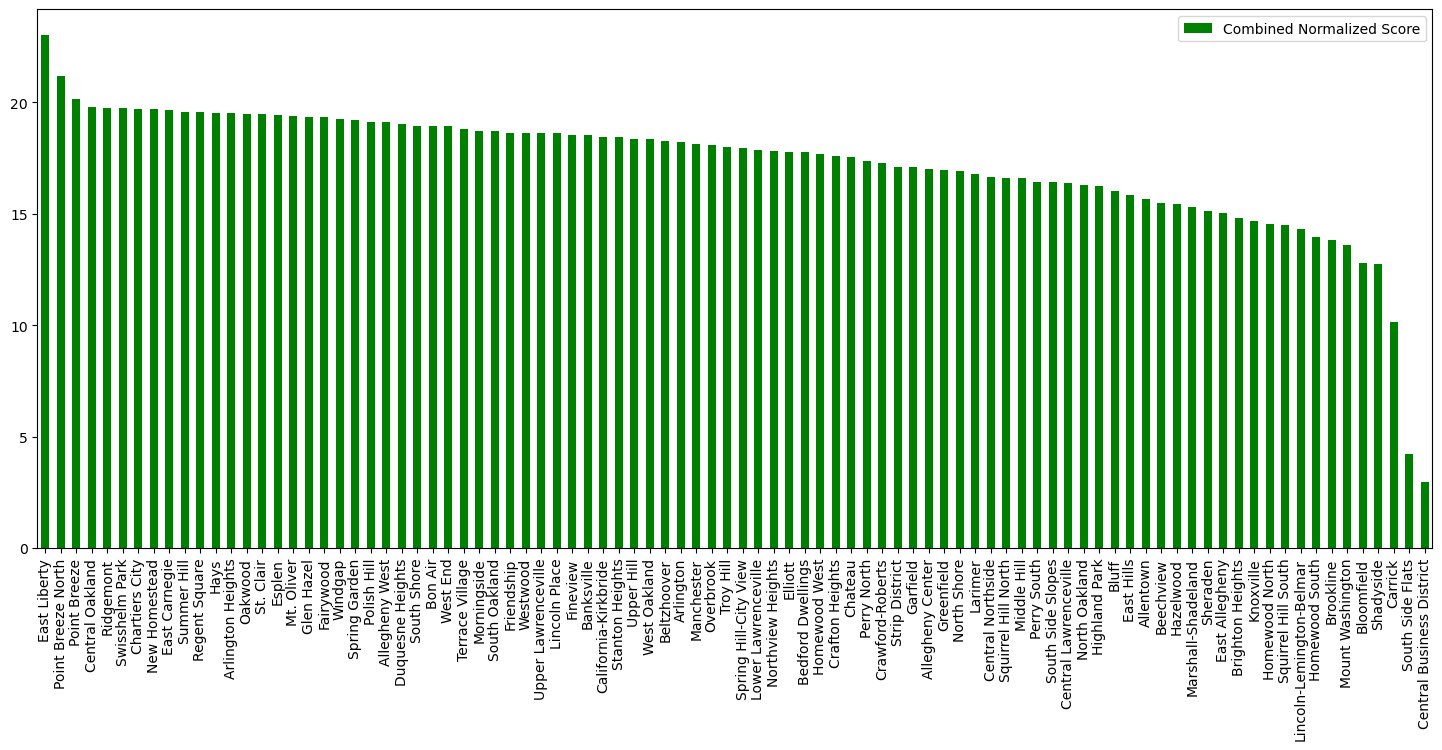

In [302]:
cngdf = pd.DataFrame.from_dict(myNeighborhoodDictCrimeAndGreen, orient='index')
cngdf.columns = ["Combined Normalized Score"]
cngdf.sort_values(by=['Combined Normalized Score'], ascending = False, inplace = True)
plt.rcParams["figure.figsize"] = (18, 7)
cngdf.plot(     kind='bar',
                y='Combined Normalized Score',
                color='green',)

Sorting the crime score and green space score dataframe by neighborhood.

In [303]:
cngdf.sort_index(inplace=True)

Sorting the fire incident score dataframe by neighborhood.

In [305]:
fire_incidents_neighborhood.sort_index(inplace=True)

Turning the values of the crime score and green space score dataframe into a list and the fire score dataframe into a list as well. Creating a list of the final score values of all neighborhoods, the score is the combination of the crime score and green space score dataframe and the fire score dataframe, with the fire score and the crime score both weighing twice as much as the green space score, and with the final scores of all the neighborhoods being on a scale from 0 - 10.

In [306]:
crimeAndGreenScores = cngdf['Combined Normalized Score'].tolist()
fireScores = fire_incidents_neighborhood['Final Score'].tolist()
finalScoreList = []

for i in range(len(fireScores)):
    final = (crimeAndGreenScores[i] + 2*fireScores[i]) / 5
    final = round(final, 1)
    finalScoreList.append(final)

Adding the fire incident scores into the crime score and green space score dataframe.

In [308]:
cngdf.insert(1, "Fire Scores", fire_incidents_neighborhood['Final Score'], True)

Adding the Final Scores into the same dataframe.

In [310]:
cngdf.insert(2, "Final Score", finalScoreList, True)

Sorting all of the data in the dataframe by value.

In [312]:
cngdf.sort_values(by=['Final Score'], ascending=False, inplace=True)

Plotting the sorted dataframe.

<Axes: >

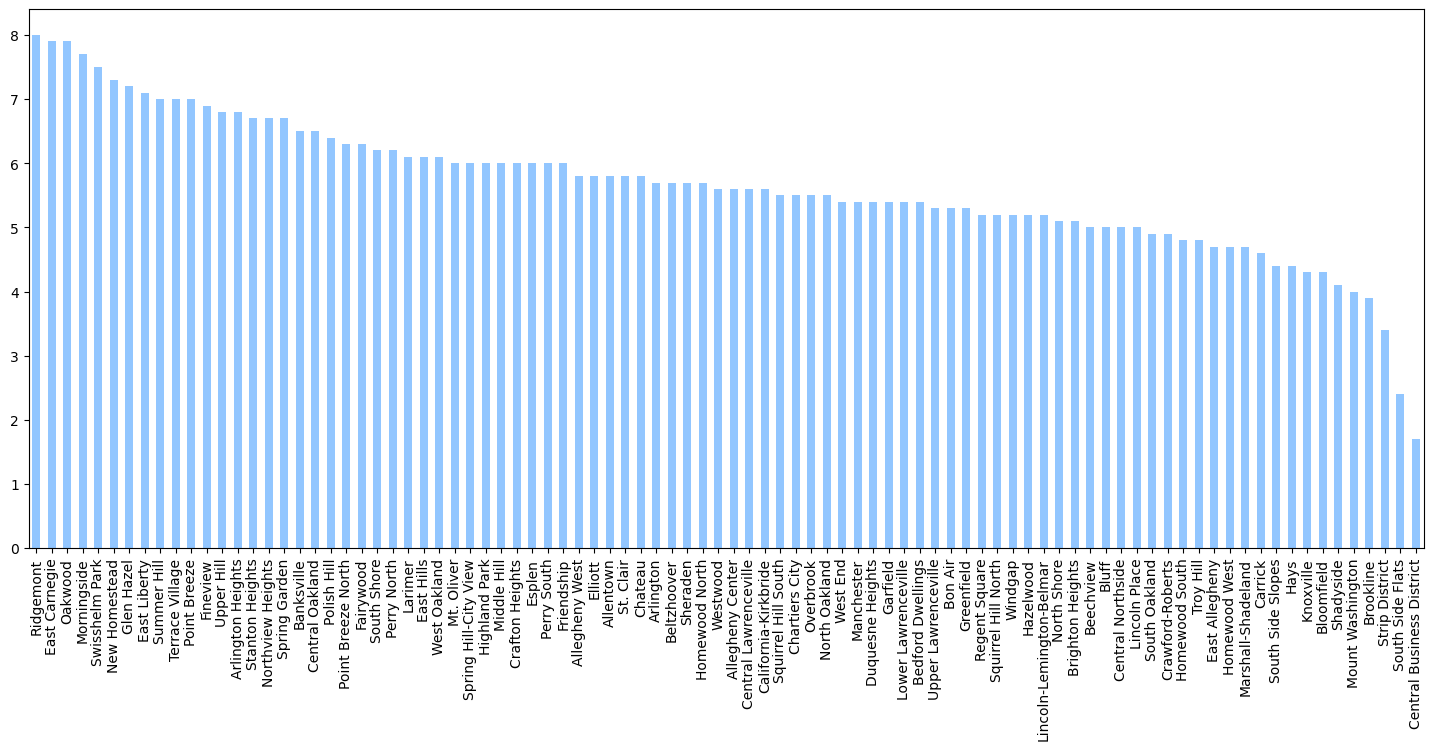

In [313]:
cngdf['Final Score'].plot(kind='bar')

Creating a GeoMap from the final dataframe.

In [316]:
steps_map_final = neighborhoods.merge(cngdf, 
                                how='left', 
                                left_on='hood', 
                                right_on=cngdf.index)

Plotting the Final GeoMap

Text(0.5, 69.97084282383948, 'Final Score')

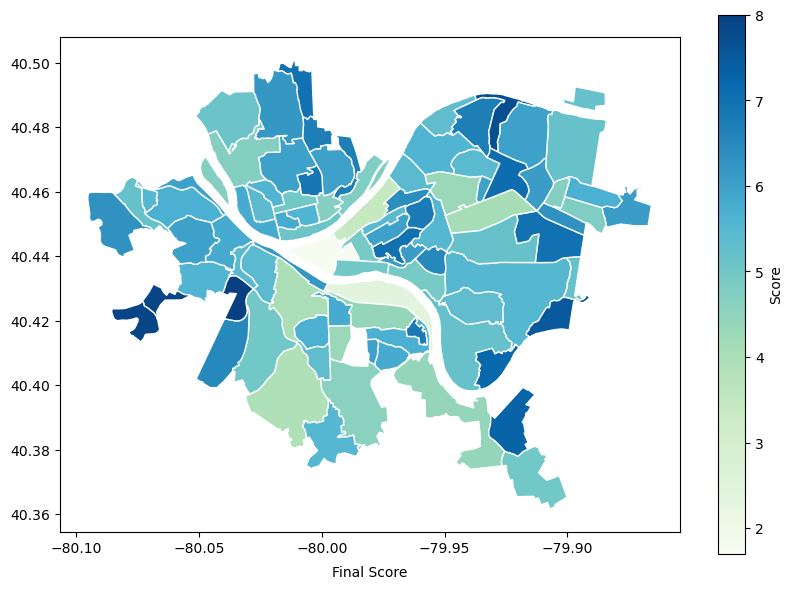

In [320]:
# draw a choropleth map using data from the column named "number_of_steps"
steps_map_final.plot(column='Final Score',
               cmap='GnBu',
               edgecolor='white',
               legend=True,
               legend_kwds={'label': "Score"},
               figsize=(10, 7),
               missing_kwds={"color": "lightgrey"})
plt.xlabel("Final Score", labelpad=7)

### Best Neighborhood
* Ridgemont, Score: 8.0

### Conclusion

We used the datasets: Police Incident Reports, Green Space Data, and Fire Incidents, in order to measure each neighborhood in Pittsburgh by the metric "Health and Safety". We normalized all of the scores before combining and weighed the value of each dataset according to how important it is. From our final dataframe that is representative of all three of our datasets, the neighborhood of Ridgemont came out as the bets neighborhood in Pittsburgh with a score of 8. One thing that can be misrepresenting is the Green Space dataset that we chose. The dataset was very limited and only accounted for a handful of neighborhoods in Pittsburgh. If the dataset for Green Spaces accounted for more neighborhoods, our final dataframe will better accurately represent the best neighborhood to live in when it come to health and safety.